# Strategic Analysis and Recommendations for SussexBudgetProductions.

**Introduction:**

In response to the challenges faced by SussexBudgetProductions as a result of the failure of the previous film, this report aims to provide actionable insights derived from an in-depth analysis of the provided IMDB movie metadata. The primary goal is to plan for the success of the next film, given the CEO's plan to secure £1.5 million in funding. The data cleaning and wrangling processes will be detailed in this report, followed by an exploratory data analysis (EDA) to uncover patterns, correlations, and trends in the dataset. Hypotheses will be developed and tested, with a focus on key factors such as budget, genre, and their impact on box office performance. Making recommendations for the production company's future actions based on facts and evidence is the ultimate goal.

In [1]:
#this is a code cell. Write the code that you want to do things in it. Include some comments with the code to 
#explain what you are doing, where appropriate. 

#standard imports for when working with pandas
import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

myfile = 'movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)


**Data Cleaning and Wrangling:**

There are 5043 entries in the dataset and 29 columns. The dataset contains duplicates and NaNs, so in order to enhance the overall quality of your dataset, I have carried out data cleaning procedures. Many statistical methods are based on the assumption that the data is complete and free of missing values. The presence of NaNs can impair the performance and accuracy of these methods, and duplicate values can indicate errors in the data entry or data collection processes. I also performed data wrangling steps such as changing the column names and dtype of column Data with consistent column names and appropriate data types inorder to reduce the risk of introducing errors or misinterpretations during analysis. And created a new column net_profit_or_loss in order to segregate the genres based on the profit and loss.

In [2]:
# inserted a new column called net_profit_or_loss into the DataFrame df to hold the determined net profit or loss for every genre.
df["net_profit_or_loss"]=df["gross"]-df["budget"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [3]:
#drops any rows in the DataFrame df that contain missing values (NaN)
df=df.dropna()
#resetting the index
df=df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3756 non-null   object 
 1   director_name              3756 non-null   object 
 2   num_critic_for_reviews     3756 non-null   float64
 3   duration                   3756 non-null   float64
 4   director_facebook_likes    3756 non-null   float64
 5   actor_3_facebook_likes     3756 non-null   float64
 6   actor_2_name               3756 non-null   object 
 7   actor_1_facebook_likes     3756 non-null   float64
 8   gross                      3756 non-null   float64
 9   genres                     3756 non-null   object 
 10  actor_1_name               3756 non-null   object 
 11  movie_title                3756 non-null   object 
 12  num_voted_users            3756 non-null   int64  
 13  cast_total_facebook_likes  3756 non-null   int64

In [4]:
#examined the dataframe's movie_title column and retrieving a boolean value to determine whether any values are duplicates..
print(df.duplicated("movie_title").any())
#dropping the duplicate rows based on the "movie_title" column
df.drop_duplicates("movie_title", keep='first', inplace=True, ignore_index=True)
df.info()

True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3655 non-null   object 
 1   director_name              3655 non-null   object 
 2   num_critic_for_reviews     3655 non-null   float64
 3   duration                   3655 non-null   float64
 4   director_facebook_likes    3655 non-null   float64
 5   actor_3_facebook_likes     3655 non-null   float64
 6   actor_2_name               3655 non-null   object 
 7   actor_1_facebook_likes     3655 non-null   float64
 8   gross                      3655 non-null   float64
 9   genres                     3655 non-null   object 
 10  actor_1_name               3655 non-null   object 
 11  movie_title                3655 non-null   object 
 12  num_voted_users            3655 non-null   int64  
 13  cast_total_facebook_likes  3655 non-null   

In [5]:
#renaming the specific columns in the DataFrame df to more meaningful and concise names
columns={"num_critic_for_reviews":"critic_reviews",
        "director_facebook_likes":"director_fb_likes",
        "actor_3_facebook_likes":"actor_3_fb_likes",
        "actor_1_facebook_likes":"actor_1_fb_likes",
        "facenumber_in_poster":"facenum_in_poster",
        "cast_total_facebook_likes":"cast_total_fb_likes",
        "num_user_for_reviews":"user_reviews",
        "actor_2_facebook_likes":"actor_2_fb_likes",
        "movie_facebook_likes":"movie_fb_likes"}
df.rename(columns=columns, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   color                3655 non-null   object 
 1   director_name        3655 non-null   object 
 2   critic_reviews       3655 non-null   float64
 3   duration             3655 non-null   float64
 4   director_fb_likes    3655 non-null   float64
 5   actor_3_fb_likes     3655 non-null   float64
 6   actor_2_name         3655 non-null   object 
 7   actor_1_fb_likes     3655 non-null   float64
 8   gross                3655 non-null   float64
 9   genres               3655 non-null   object 
 10  actor_1_name         3655 non-null   object 
 11  movie_title          3655 non-null   object 
 12  num_voted_users      3655 non-null   int64  
 13  cast_total_fb_likes  3655 non-null   int64  
 14  actor_3_name         3655 non-null   object 
 15  facenum_in_poster    3655 non-null   f

In [6]:
#onverting the specific columns in the DataFrame df to integer data types using the astype method
convert_dict = {'critic_reviews':'int64',
                'director_fb_likes': 'int64',
                'actor_3_fb_likes':'int64',
                'actor_1_fb_likes': 'int64',
                'facenum_in_poster':'int64',
                'user_reviews':'int64',
                'title_year':'int64',
                'actor_2_fb_likes':'int64' 
                }
 
df = df.astype(convert_dict)
#'actor_1_fb_likes':'int64',
print(df.dtypes)

color                   object
director_name           object
critic_reviews           int64
duration               float64
director_fb_likes        int64
actor_3_fb_likes         int64
actor_2_name            object
actor_1_fb_likes         int64
gross                  float64
genres                  object
actor_1_name            object
movie_title             object
num_voted_users          int64
cast_total_fb_likes      int64
actor_3_name            object
facenum_in_poster        int64
plot_keywords           object
movie_imdb_link         object
user_reviews             int64
language                object
country                 object
content_rating          object
budget                 float64
title_year               int64
actor_2_fb_likes         int64
imdb_score             float64
aspect_ratio           float64
movie_fb_likes           int64
net_profit_or_loss     float64
dtype: object


In [7]:
#split the original DataFrame df into two new DataFrames: 
#profit_movies_df --> movies with net profit
profit_movies_df = df[df['net_profit_or_loss'] > 0]
#loss_movies_df --> movies with net loss
loss_movies_df = df[df['net_profit_or_loss'] < 0]
print(profit_movies_df.count())
profit_movies_df.head(5)

color                  1954
director_name          1954
critic_reviews         1954
duration               1954
director_fb_likes      1954
actor_3_fb_likes       1954
actor_2_name           1954
actor_1_fb_likes       1954
gross                  1954
genres                 1954
actor_1_name           1954
movie_title            1954
num_voted_users        1954
cast_total_fb_likes    1954
actor_3_name           1954
facenum_in_poster      1954
plot_keywords          1954
movie_imdb_link        1954
user_reviews           1954
language               1954
country                1954
content_rating         1954
budget                 1954
title_year             1954
actor_2_fb_likes       1954
imdb_score             1954
aspect_ratio           1954
movie_fb_likes         1954
net_profit_or_loss     1954
dtype: int64


color      director_name  critic_reviews  duration  director_fb_likes  \
0  Color      James Cameron             723     178.0                  0   
1  Color     Gore Verbinski             302     169.0                563   
3  Color  Christopher Nolan             813     164.0              22000   
5  Color          Sam Raimi             392     156.0                  0   
7  Color        Joss Whedon             635     141.0                  0   

   actor_3_fb_likes       actor_2_name  actor_1_fb_likes        gross  \
0               855   Joel David Moore              1000  760505847.0   
1              1000      Orlando Bloom             40000  309404152.0   
3             23000     Christian Bale             27000  448130642.0   
5              4000       James Franco             24000  336530303.0   
7             19000  Robert Downey Jr.             26000  458991599.0   

                            genres  ... language country  content_rating  \
0  Action|Adventure|Fantasy|Sci-Fi  ...  English     USA           PG-13   
1         Action|Adventure|Fantasy  ...  English     USA           PG-13   
3                  Action|Thriller  ...  English     USA           PG-13   
5         Action|Adventure|Romance  ...  English     USA           PG-13   
7          Action|Adventure|Sci-Fi  ...  English     USA           PG-13   

        budget title_year  actor_2_fb_likes imdb_score aspect_ratio  \
0  237000000.0       2009               936        7.9         1.78   
1  300000000.0       2007              5000        7.1         2.35   
3  250000000.0       2012             23000        8.5         2.35   
5  258000000.0       2007             11000        6.2         2.35   
7  250000000.0       2015             21000        7.5         2.35   

   movie_fb_likes net_profit_or_loss  
0           33000        523505847.0  
1               0          9404152.0  
3          164000        198130642.0  
5               0         78530303.0  
7          118000        208991599.0  

[5 rows x 29 columns]

In [8]:
print(loss_movies_df.count())
loss_movies_df.head(5)

color                  1701
director_name          1701
critic_reviews         1701
duration               1701
director_fb_likes      1701
actor_3_fb_likes       1701
actor_2_name           1701
actor_1_fb_likes       1701
gross                  1701
genres                 1701
actor_1_name           1701
movie_title            1701
num_voted_users        1701
cast_total_fb_likes    1701
actor_3_name           1701
facenum_in_poster      1701
plot_keywords          1701
movie_imdb_link        1701
user_reviews           1701
language               1701
country                1701
content_rating         1701
budget                 1701
title_year             1701
actor_2_fb_likes       1701
imdb_score             1701
aspect_ratio           1701
movie_fb_likes         1701
net_profit_or_loss     1701
dtype: int64


color   director_name  critic_reviews  duration  director_fb_likes  \
2   Color      Sam Mendes             602     148.0                  0   
4   Color  Andrew Stanton             462     132.0                475   
6   Color    Nathan Greno             324     100.0                 15   
10  Color    Bryan Singer             434     169.0                  0   
11  Color    Marc Forster             403     106.0                395   

    actor_3_fb_likes     actor_2_name  actor_1_fb_likes        gross  \
2                161     Rory Kinnear             11000  200074175.0   
4                530  Samantha Morton               640   73058679.0   
6                284     Donna Murphy               799  200807262.0   
10               903    Marlon Brando             18000  200069408.0   
11               393  Mathieu Amalric               451  168368427.0   

                                               genres  ... language country  \
2                           Action|Adventure|Thriller  ...  English      UK   
4                             Action|Adventure|Sci-Fi  ...  English     USA   
6   Adventure|Animation|Comedy|Family|Fantasy|Musi...  ...  English     USA   
10                            Action|Adventure|Sci-Fi  ...  English     USA   
11                                   Action|Adventure  ...  English      UK   

    content_rating       budget title_year  actor_2_fb_likes imdb_score  \
2            PG-13  245000000.0       2015               393        6.8   
4            PG-13  263700000.0       2012               632        6.6   
6               PG  260000000.0       2010               553        7.8   
10           PG-13  209000000.0       2006             10000        6.1   
11           PG-13  200000000.0       2008               412        6.7   

   aspect_ratio  movie_fb_likes net_profit_or_loss  
2          2.35           85000        -44925825.0  
4          2.35           24000       -190641321.0  
6          1.85           29000        -59192738.0  
10         2.35               0         -8930592.0  
11         2.35               0        -31631573.0  

[5 rows x 29 columns]

**Exploratory Data Analysis (EDA):**

Understanding the distribution of important variables like budget, gross, net_profit_or_loss and IMDb ratings should be the main goal of our EDA. To reveal insights, correlation analyses, visualisations, and descriptive statistics were used. Notably, we looked at the distribution of IMDb ratings in order to identify potential trends that could influence the success of future films. The use of box plots and histograms helped to visualise the spread and central tendencies of critical variables. However, we can do it in a hazy manner by inspecting the correlation matrix and utilising the features that are correlated on average based on the net_profit_or_loss levels.

Very high correlation: critic_reviews and critic_reviews
Negligible correlation: critic_reviews and duration
Negligible correlation: critic_reviews and director_fb_likes
Negligible correlation: critic_reviews and actor_3_fb_likes
Negligible correlation: critic_reviews and actor_1_fb_likes
Low correlation: critic_reviews and gross
High correlation: critic_reviews and num_voted_users
Negligible correlation: critic_reviews and cast_total_fb_likes
Negligible correlation: critic_reviews and facenum_in_poster
High correlation: critic_reviews and user_reviews
Low correlation: critic_reviews and budget
Moderate correlation: critic_reviews and title_year
Negligible correlation: critic_reviews and actor_2_fb_likes
Low correlation: critic_reviews and imdb_score
Negligible correlation: critic_reviews and aspect_ratio
Low correlation: critic_reviews and movie_fb_likes


<AxesSubplot:>

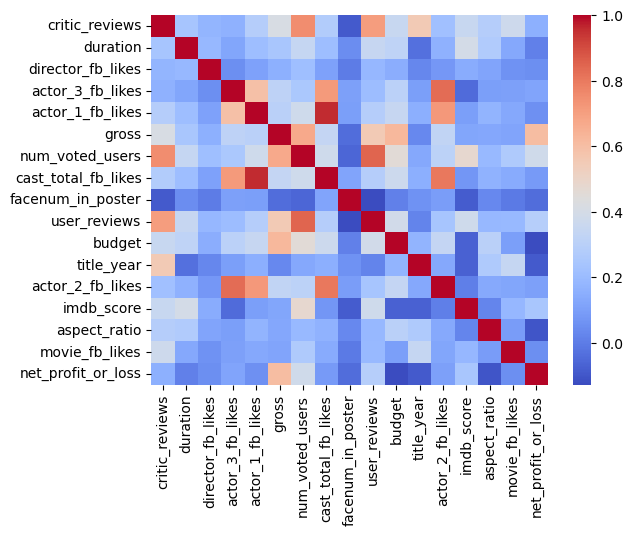

In [59]:
# Calculate Spearman correlation matrix
corr = df.corr(method="spearman")
cols = profit_movies_df_numeric.columns
col1 = "critic_reviews"
for col2 in cols[:-1]:
    correlation = corr[col1][col2]
    if np.abs(correlation) < 0.3:
        print(f"Negligible correlation: {col1} and {col2}")
    if 0.3 <= np.abs(correlation) < 0.5:
        print(f"Low correlation: {col1} and {col2}")
    if 0.5 <= np.abs(correlation) < 0.7:
        print(f"Moderate correlation: {col1} and {col2}")
    if 0.7 <= np.abs(correlation) < 0.9:
        print(f"High correlation: {col1} and {col2}")
    if 0.9 <= np.abs(correlation):
        print(f"Very high correlation: {col1} and {col2}")
# Plot a heatmap of the correlation matrix
sns.heatmap(data=corr, cmap="coolwarm")

gross: Skewness = 3.03, Kurtosis = 14.02
budget: Skewness = 23.88, Kurtosis = 756.13
net_profit_or_loss: Skewness = -20.64, Kurtosis = 632.98
critic_reviews: Skewness = 1.46, Kurtosis = 2.66
imdb_score: Skewness = -0.72, Kurtosis = 1.15


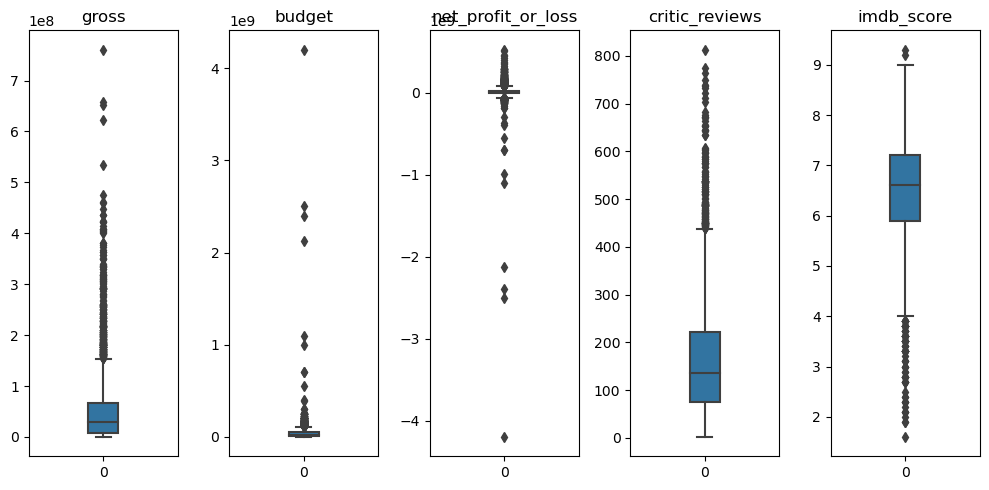

In [55]:
# Define columns for box plots
movie_cols = ["gross", "budget", "net_profit_or_loss",  "critic_reviews", "imdb_score"]

# Create subplots with 1 row and 4 columns using seaborn
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 5))

# Iterate through columns and create box plots using seaborn
for col, ax in zip(movie_cols, axes):
    # Create box plot for each column using seaborn
    sns.boxplot(data=df[col], ax=ax, width=0.2)
    # Set the title for each box plot
    ax.set_title(col)

# Calculate skewness and kurtosis for each specified column
for col in movie_cols:
    skewness = df[col].skew()
    kurt = df[col].kurtosis()
    print(f"{col}: Skewness = {skewness:.2f}, Kurtosis = {kurt:.2f}")
    
# Adjust the layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


The above plots are not gaussian enough, because of the skewed data in it.

**The below code is adepted from the Lecture 5 and modified as per my requirement**

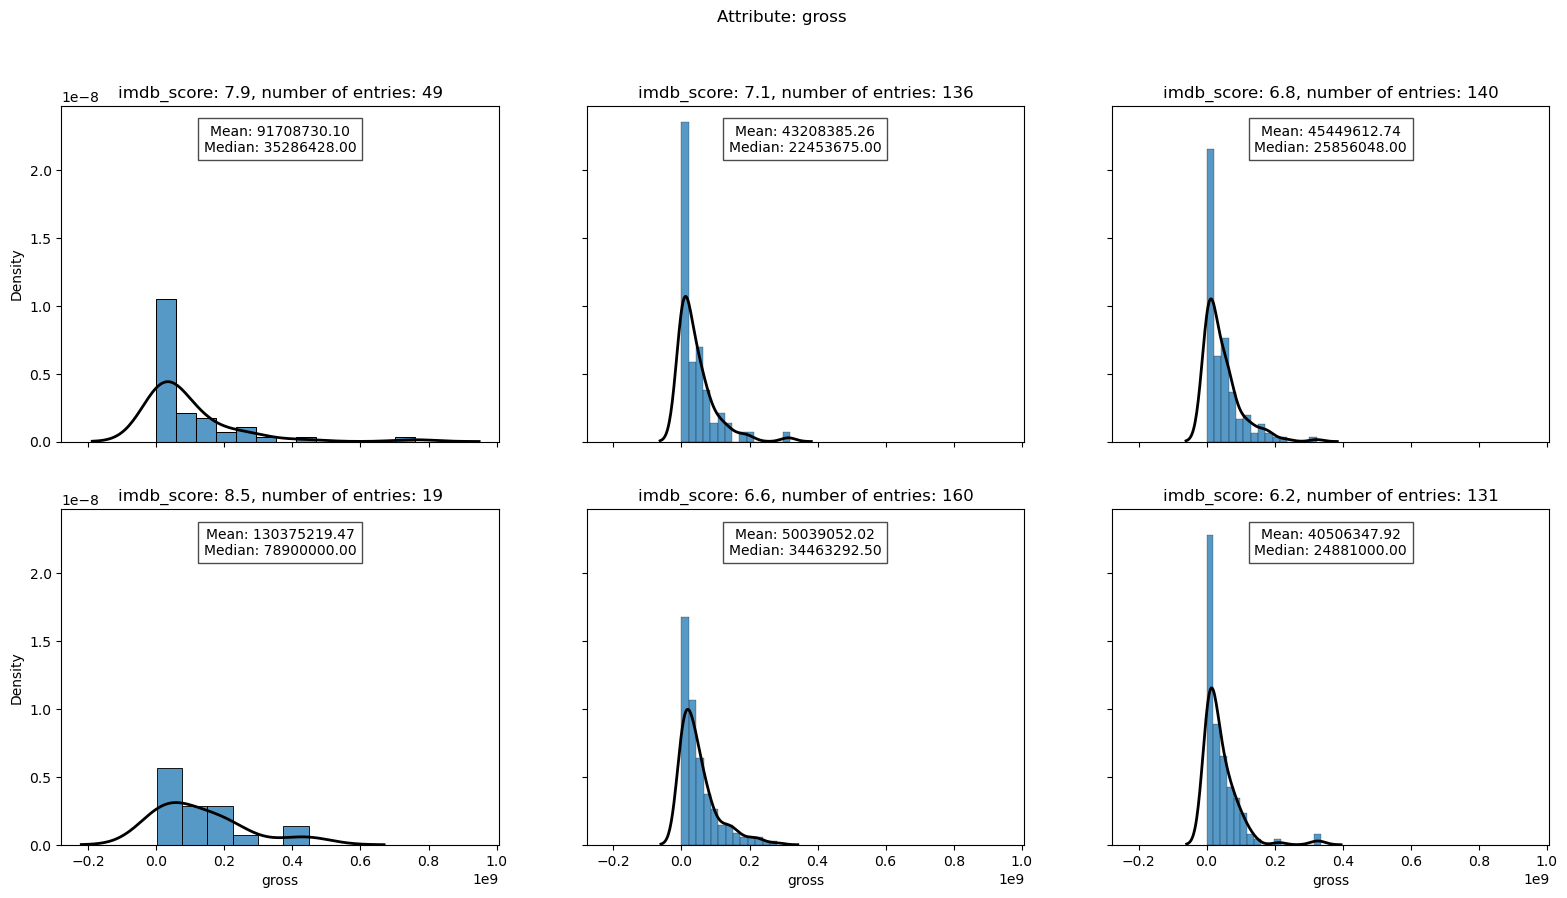

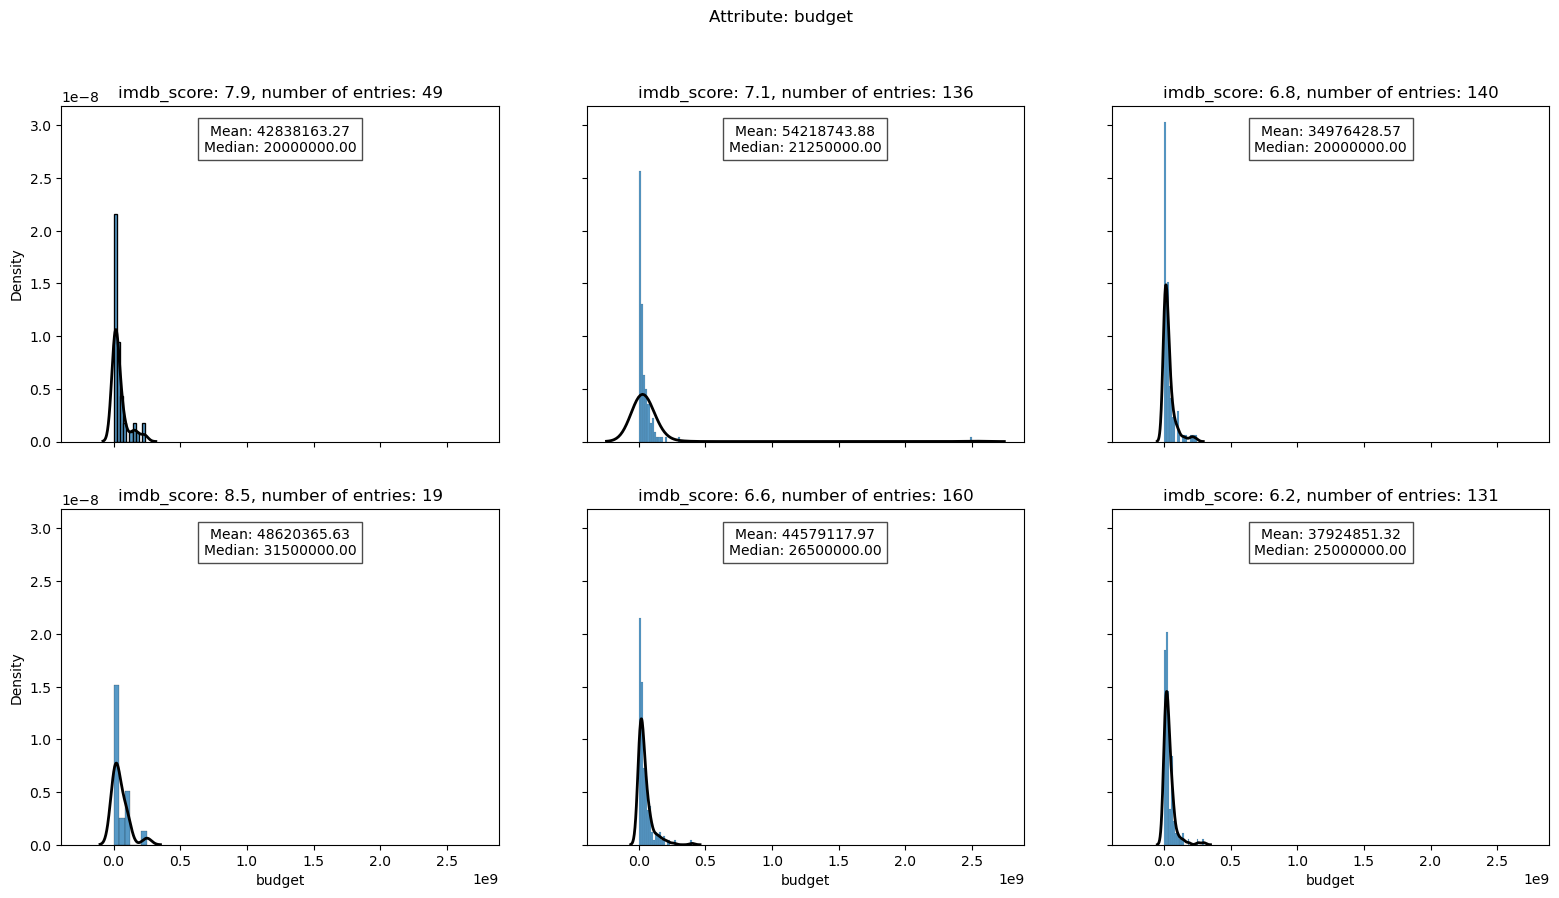

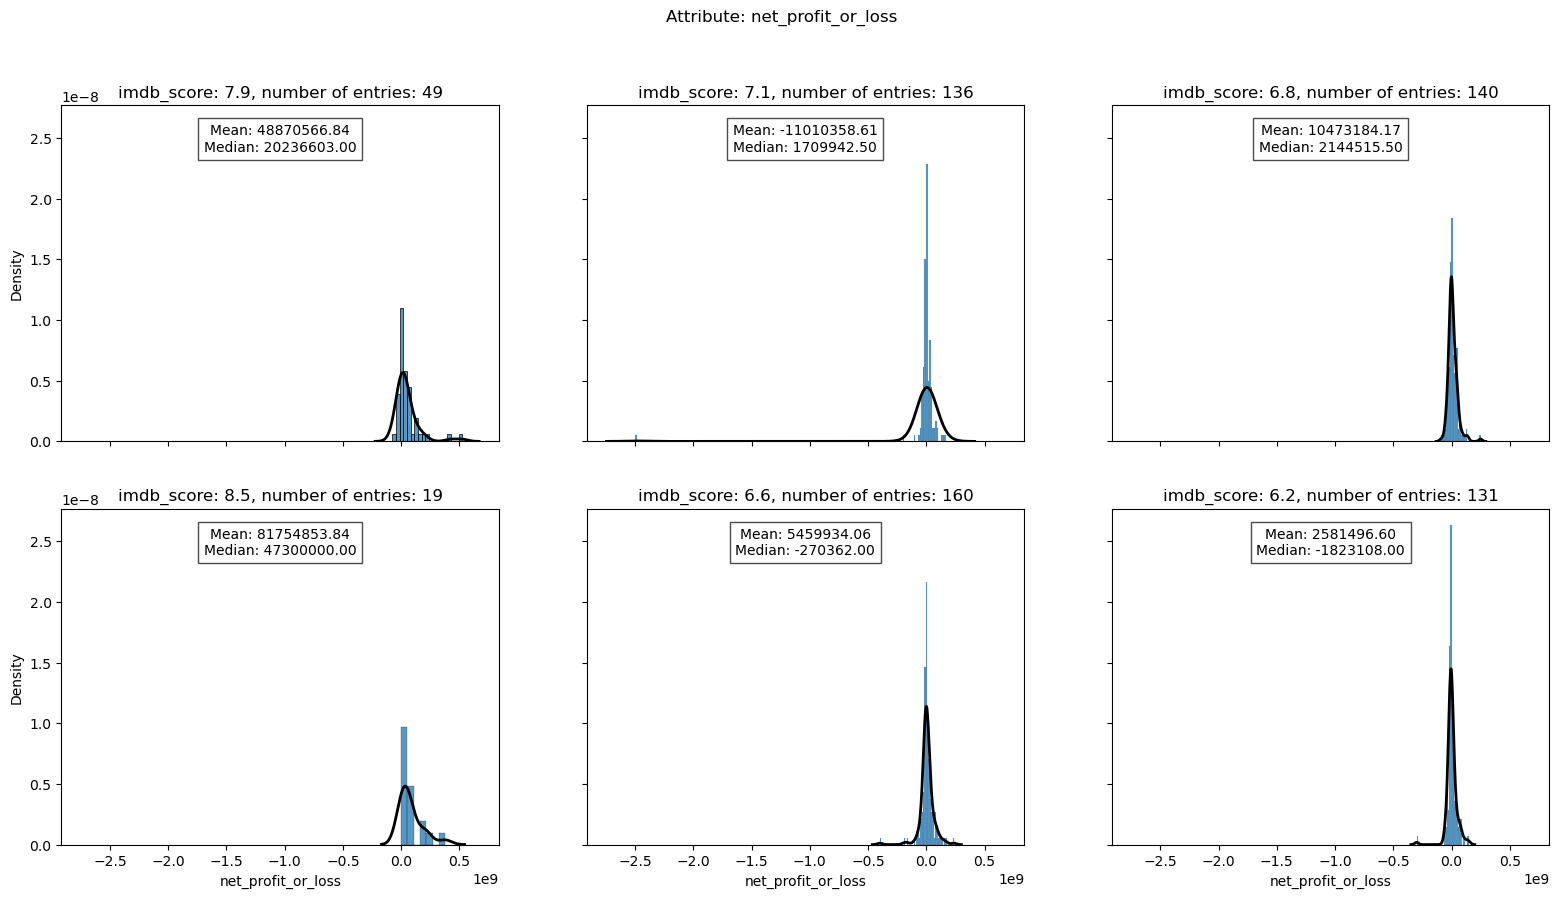

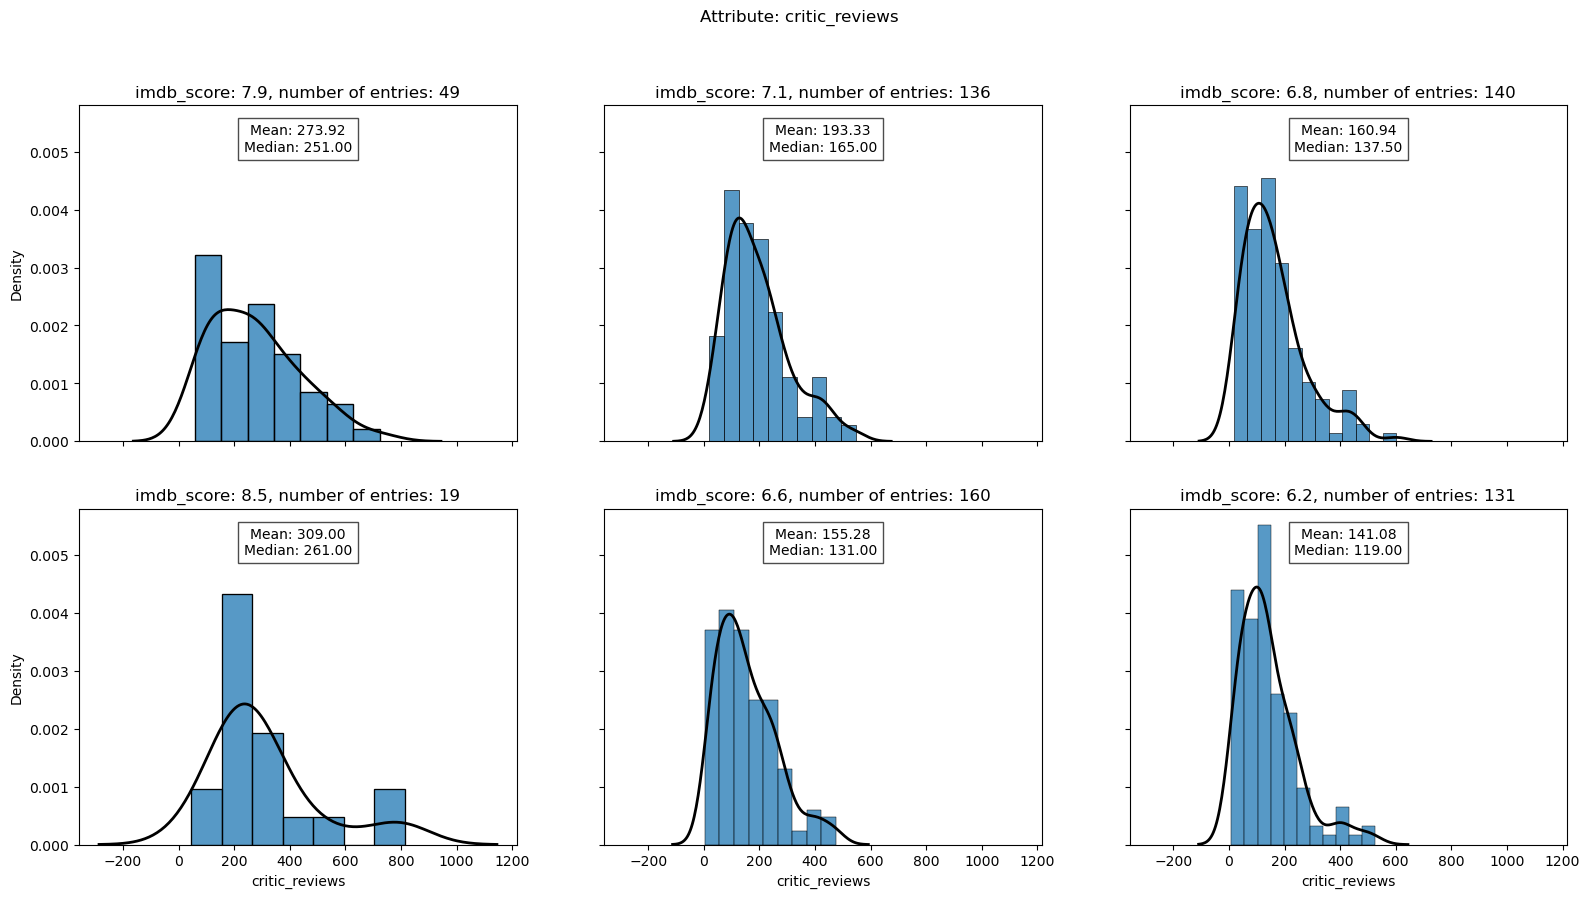

In [56]:
# Iterate through columns, excluding the last one ('imdb_score')
for col in movie_cols[:-1]:
     # Select the relevant columns from the DataFrame
    col_series = df[[col,"imdb_score"]]
    # Create subplots with 2 rows and 3 columns, sharing the same x and y axes
    fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey=True)
    # Iterate through unique imdb_score values
    for q,ax in zip(df.imdb_score,axes.flatten()):
        # Select data for the current imdb_score value
        q_series = col_series[col_series["imdb_score"] == q][col]
        # Create a histogram and kernel density estimate (KDE) plot for the selected data
        sns.histplot(data=q_series,ax=ax, stat="density")
        sns.kdeplot(data=q_series,ax=ax,color="k", linewidth=2)
        
        # Calculate and display mean and median
        mean_val = q_series.mean()
        median_val = q_series.median()
        ax.text(0.5, 0.9, f"Mean: {mean_val:.2f}\nMedian: {median_val:.2f}", 
            transform=ax.transAxes, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7))
        # Set the title for each subplot
        ax.set_title(f"imdb_score: {q}, number of entries: {len(q_series)}")
        # Set the figure title based on the current column
        fig.suptitle(f"Attribute: {col}")

    fig.set_figwidth(fig.get_figwidth() * 3.0)
    fig.set_figheight(fig.get_figheight() * 2.0)

1. Gross, the range of 4 to 6 seems to contain more extreme values, or outliers, that diverge from the rest of the observations. The typical Gaussian distribution bell shape is absent from these histograms.
2. The budget is also affected by outliers; a statistical test is required to verify this.
3. Although there are a few tiny outliers in net profit or loss, the possible number is minimal given the size of the dataset. The KDEs might be Gaussian if the tails were absent.

I am going to check the distributions first to see if any are Gaussian. I will do a k-s plot and Lilliefors test.

**The below code is adepted from the Lab 6 and modified as per my requirement**

In [12]:
from scipy.stats import ks_2samp
# Set the significance level
alpha = 0.001
# Select numeric columns from profit and loss movie DataFrames
profit_movies_df_numeric = profit_movies_df.select_dtypes(exclude='object')
loss_movies_df_numeric = loss_movies_df.select_dtypes(exclude='object')
# Initialize a list to store significant columns
sig_cols = []
# Iterate through numeric columns and perform Kolmogorov-Smirnov (KS) test
for idx, col in enumerate(profit_movies_df_numeric.columns):
    # Perform KS test between the distributions of the two groups
    ks_statistic,p_value_ks = ks_2samp(profit_movies_df_numeric[col],loss_movies_df_numeric[col])
    # Check if the p-value is below the significance level
    if p_value_ks < alpha:
        print(f"KS: The low and high profit distributions are significantly different for {col} at the {100*alpha}% significance level, p-value = {p_value_ks}")
        sig_cols.append(col)
    else:
        print(f"KS: The low and high profit distributions are not significantly different for {col} at the {100*alpha}% significance level, p-value = {p_value_ks}")

KS: The low and high profit distributions are significantly different for critic_reviews at the 0.1% significance level, p-value = 4.0140460394984175e-14
KS: The low and high profit distributions are not significantly different for duration at the 0.1% significance level, p-value = 0.5546741798234189
KS: The low and high profit distributions are significantly different for director_fb_likes at the 0.1% significance level, p-value = 0.0002551702834213426
KS: The low and high profit distributions are significantly different for actor_3_fb_likes at the 0.1% significance level, p-value = 2.1875748290049358e-06
KS: The low and high profit distributions are not significantly different for actor_1_fb_likes at the 0.1% significance level, p-value = 0.018190243250293142
KS: The low and high profit distributions are significantly different for gross at the 0.1% significance level, p-value = 1.6234757248534748e-202
KS: The low and high profit distributions are significantly different for num_vote

**The below code is adepted from the Lab 6 and modified as per my requirement**

In [13]:
from scipy.stats import normaltest
from statsmodels.stats.diagnostic import lilliefors
# Initialize lists to store columns based on normality tests
norm_cols = []
not_norm_cols = [] 
# Iterate through columns with significantly different distributions
for col in sig_cols:
    # Performing normality tests for profit and loss distributions
    _,p_value_n_q = normaltest(profit_movies_df_numeric[col])
    _,p_value_n_lq = normaltest(loss_movies_df_numeric[col])
    
    # Check if at least one distribution is not Gaussian based on normaltest
    if (p_value_n_q < alpha) or (p_value_n_lq < alpha):
        print(f"KSquared: At least one {col} distribution is statistically not Gaussian at the {100*alpha}% significance level, ({p_value_n_q},{p_value_n_lq})")
        not_norm_cols.append(col)
    else:
        # Perform Lilliefors test for normality
        _,p_value_lf_q = lilliefors(profit_movies_df[col],dist="norm")
        _,p_value_lf_lq = lilliefors(loss_movies_df[col],dist="norm")
         # Check if both distributions are statistically Gaussian based on Lilliefors test
        if (p_value_lf_q > alpha) and (p_value_lf_lq > alpha):
            print(f"Lilliefors: Both {col} distributions are statistically Gaussian at the {100*alpha}% significance level, ({p_value_lf_q},{p_value_lf_lq})")
            norm_cols.append(col)
        else:
            print(f"Lilliefors: At least one {col} distributions are not statistically Gaussian at the {100*alpha}% significance level, ({p_value_lf_q},{p_value_lf_lq})")
            not_norm_cols.append(col)

KSquared: At least one critic_reviews distribution is statistically not Gaussian at the 0.1% significance level, (4.175107117563476e-105,9.47237515867901e-86)
KSquared: At least one director_fb_likes distribution is statistically not Gaussian at the 0.1% significance level, (0.0,0.0)
KSquared: At least one actor_3_fb_likes distribution is statistically not Gaussian at the 0.1% significance level, (0.0,0.0)
KSquared: At least one gross distribution is statistically not Gaussian at the 0.1% significance level, (4.403297836799237e-235,4.652976757068132e-209)
KSquared: At least one num_voted_users distribution is statistically not Gaussian at the 0.1% significance level, (1.0068310695814079e-282,0.0)
KSquared: At least one cast_total_fb_likes distribution is statistically not Gaussian at the 0.1% significance level, (0.0,0.0)
KSquared: At least one user_reviews distribution is statistically not Gaussian at the 0.1% significance level, (0.0,1.0528387558799545e-306)
KSquared: At least one bu

As the underlying distribution is not gaussian, so i am booststrapping the samples in order to perform the T test.

**The below code is adepted from the Lecture 5 and modified as per my requirement**

In [14]:
def bootstrap_diff_means(data_1,data_2,num_bootstraps=10000):
    m_1 = np.mean(data_1)
    m_2 = np.mean(data_2)
    v_1 = np.var(data_1, ddof=1)
    v_2 = np.var(data_2, ddof=1)
    n_1 = len(data_1)
    n_2 = len(data_2)
    se = np.sqrt(v_1/n_1 + v_2/n_2)
    t_stat = (m_1 - m_2)/se

    comb_m = (np.sum(data_1) + np.sum(data_2))/(n_1 + n_2)

    adj_col1 = data_1 - m_1 + comb_m
    adj_col2 = data_2 - m_2 + comb_m

    count = 0
    for _ in range(num_bootstraps):
        bs_1 = np.array([adj_col1[i] for i in np.random.randint(0,n_1,size=n_1)])
        bs_2 = np.array([adj_col2[i] for i in np.random.randint(0,n_2,size=n_2)]) 
        
        bs_m_1 = np.mean(bs_1)
        bs_m_2 = np.mean(bs_2)
        bs_v_1 = np.var(bs_1,ddof=1)
        bs_v_2 = np.var(bs_2,ddof=1)
        bs_se = np.sqrt(bs_v_1/n_1 + bs_v_2/n_2)
        
        bs_t_stat = (bs_m_1 - bs_m_2)/bs_se
        
        if np.abs(bs_t_stat) >= np.abs(t_stat):
            count += 1 

    return m_1 - m_2, t_stat, (count+1)/(num_bootstraps+1)
    
data_1 = profit_movies_df_numeric.to_numpy()
data_2 = loss_movies_df_numeric[col].to_numpy()
    
d0 = 0 
dbar, _, p_value = bootstrap_diff_means(data_1,data_2)
#print(f"Comparing {col} quality rating {profit_movies_df_numeric} and {loss_movies_df_numeric}")
print(f"There is a probability of {p_value:.4f} that the observed difference of mean being different to {dbar:.4f} given the underlying difference of means is 0")
print("\n")
    

There is a probability of 0.0002 that the observed difference of mean being different to 37419354.8205 given the underlying difference of means is 0




**Hypothesis:**

Statement:
On average net_profit of the movies will be higher on average if the critic_reviews are higher.

Mathematical Process:
To see if there is a difference in the averages at the 0.1% significance level, I want to run a difference of means Bootstrap test on the two samples. I stated in the hypothesis statement that "net profit will be higher on average if the critic reviews are higher on average," so a right-sided tail test is required.

\begin{align*}
\mathbf{H}_0 \quad &: \quad \mu_{hq} - \mu_{lq} = 0 \\
\mathbf{H}_1 \quad &: \quad \mu_{hq} - \mu_{lq} > 0
\end{align*}
 
where  $\mu_{hq}$
  denotes the mean of the profit movies sample group and  $\mu_{lq}$
  denotes the mean of the loss movies sample group.

**The below code is adepted from the Lab 6 and modified as per my requirement**

In [15]:
# this will take approximately 1minute
# Initialized lists to store significant columns and differences in means
sig_mean_cols = []
dbars = [] 
# Iterate through columns identified as not following a Gaussian distribution
for col in not_norm_cols:
    # Extract the numeric data from profit and loss movies for the current column
    data_1 = profit_movies_df_numeric[col].to_numpy()
    data_2 = loss_movies_df_numeric[col].to_numpy()
    # Perform bootstrap hypothesis test for the difference in means
    dbar, _, p_value_bs = bootstrap_diff_means(data_1,data_2)
    # Check if the bootstrap test yields a significant result
    if p_value_bs < alpha:
        print(f"Bootstrap: There is significant evidence to state that the average {col} levels for net_profit_or_loss > 0 is different to net_profit_or_loss <= 0 at the {100*alpha}% significance level, p-value = {p_value_bs}")
        sig_mean_cols.append(col)
        dbars.append(dbar)
    else:
        print(f"Bootstrap: There is not significant evidence to state that the average {col} levels for net_profit_or_loss > 0 is net_profit_or_loss <= 0 at the {100*alpha}% significance level, p-value = {p_value_bs}")

Bootstrap: There is significant evidence to state that the average critic_reviews levels for net_profit_or_loss > 0 is different to net_profit_or_loss <= 0 at the 0.1% significance level, p-value = 9.999000099990002e-05
Bootstrap: There is not significant evidence to state that the average director_fb_likes levels for net_profit_or_loss > 0 is net_profit_or_loss <= 0 at the 0.1% significance level, p-value = 0.0018998100189981002
Bootstrap: There is significant evidence to state that the average actor_3_fb_likes levels for net_profit_or_loss > 0 is different to net_profit_or_loss <= 0 at the 0.1% significance level, p-value = 9.999000099990002e-05
Bootstrap: There is significant evidence to state that the average gross levels for net_profit_or_loss > 0 is different to net_profit_or_loss <= 0 at the 0.1% significance level, p-value = 9.999000099990002e-05
Bootstrap: There is significant evidence to state that the average num_voted_users levels for net_profit_or_loss > 0 is different to 

The line "There is significant evidence to state that the average critic_reviews levels for net_profit_or_loss > 0 is different to net_profit_or_loss = 0 at the 0.1% significance level, p-value = 9.999000099990002e-05" in the output above, for instance, indicates that there is a significant difference between the average critic_reviews for profitable and non-profitable movies, and that this difference is observed at an incredibly low significance level of 0.0001.

**The below code is adepted from the Lab 6 and modified as per my requirement**

In [16]:
print(f"To get statistically better profit generated movie (at the {100*alpha}% signficance level), on average we want")
for idx,(db,col) in enumerate(zip(dbars,sig_mean_cols)):
    if db < 0:
        print(f"{idx+1}: Lower levels of {col}")
    else:
        print(f"{idx+1}: Higher levels of {col}")

To get statistically better profit generated movie (at the 0.1% signficance level), on average we want
1: Higher levels of critic_reviews
2: Higher levels of actor_3_fb_likes
3: Higher levels of gross
4: Higher levels of num_voted_users
5: Higher levels of user_reviews
6: Lower levels of title_year
7: Higher levels of imdb_score
8: Lower levels of aspect_ratio
9: Higher levels of movie_fb_likes
10: Higher levels of net_profit_or_loss


We reject the null hypothesis at the 0.1% significance level because the 𝑃-𝑣𝑎𝑙𝑢𝑒 from the Bootstrapped test of the difference of the means is less than our selected significance (9.999000099990002e-05). In other words, there is enough data to conclude that, on average, higher movie profits correlate with higher levels of critical reviews.

# Summary

Statement: I have created a new column in the dataframe to examine what type of genre of movies had generated high returns.

Detail of what i did and what i found:

To determine if the provided samples are gaussian or not, I first conduct some EDA analysis. Additionally, I looked into whether genres with more positive critic reviews could do well at the box office and turn a profit. I've completed the statistical analysis and can confirm that, on average, the genres with more critic reviews did better at the box office.


conclusion:

Based on the above data analysis, I could recommend that the studio pursue making a film in the genre which has higher critic_reviews. 

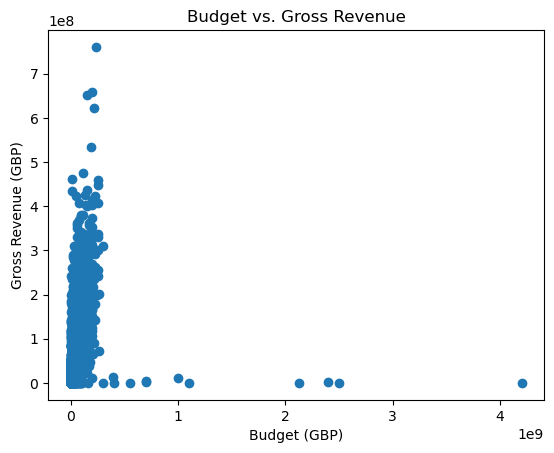

In [17]:
# Sample code for budget vs. gross revenue
import matplotlib.pyplot as plt
plt.scatter(df['budget'], df['gross'])
plt.xlabel('Budget (GBP)')
plt.ylabel('Gross Revenue (GBP)')
plt.title('Budget vs. Gross Revenue')
plt.show()


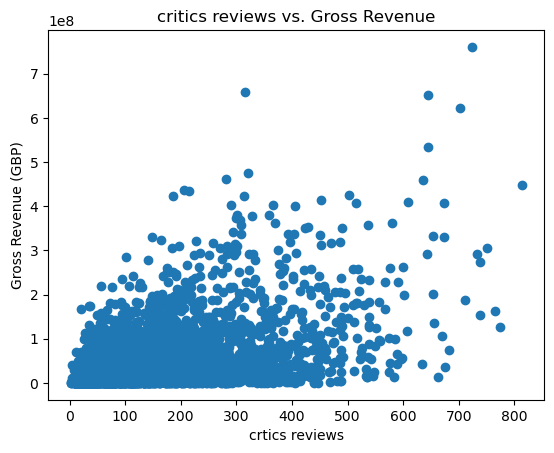

In [52]:
# Sample code for budget vs. gross revenue
import matplotlib.pyplot as plt
plt.scatter(df['critic_reviews'], df['gross'])
plt.xlabel('crtics reviews')
plt.ylabel('Gross Revenue (GBP)')
plt.title('critics reviews vs. Gross Revenue')
plt.show()

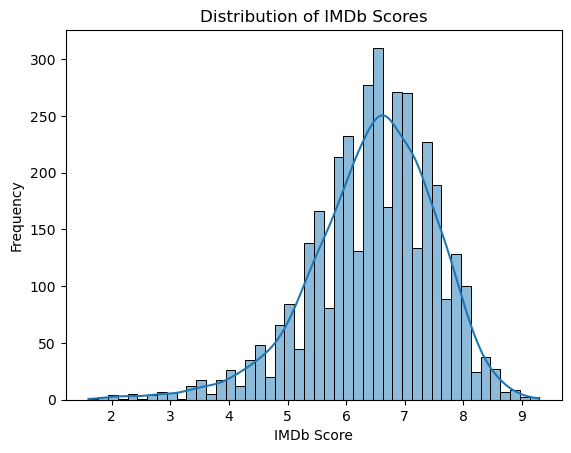

In [49]:
# Sample code for IMDb scores distribution
import seaborn as sns
sns.histplot(df['imdb_score'], kde=True)
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Scores')
plt.show()


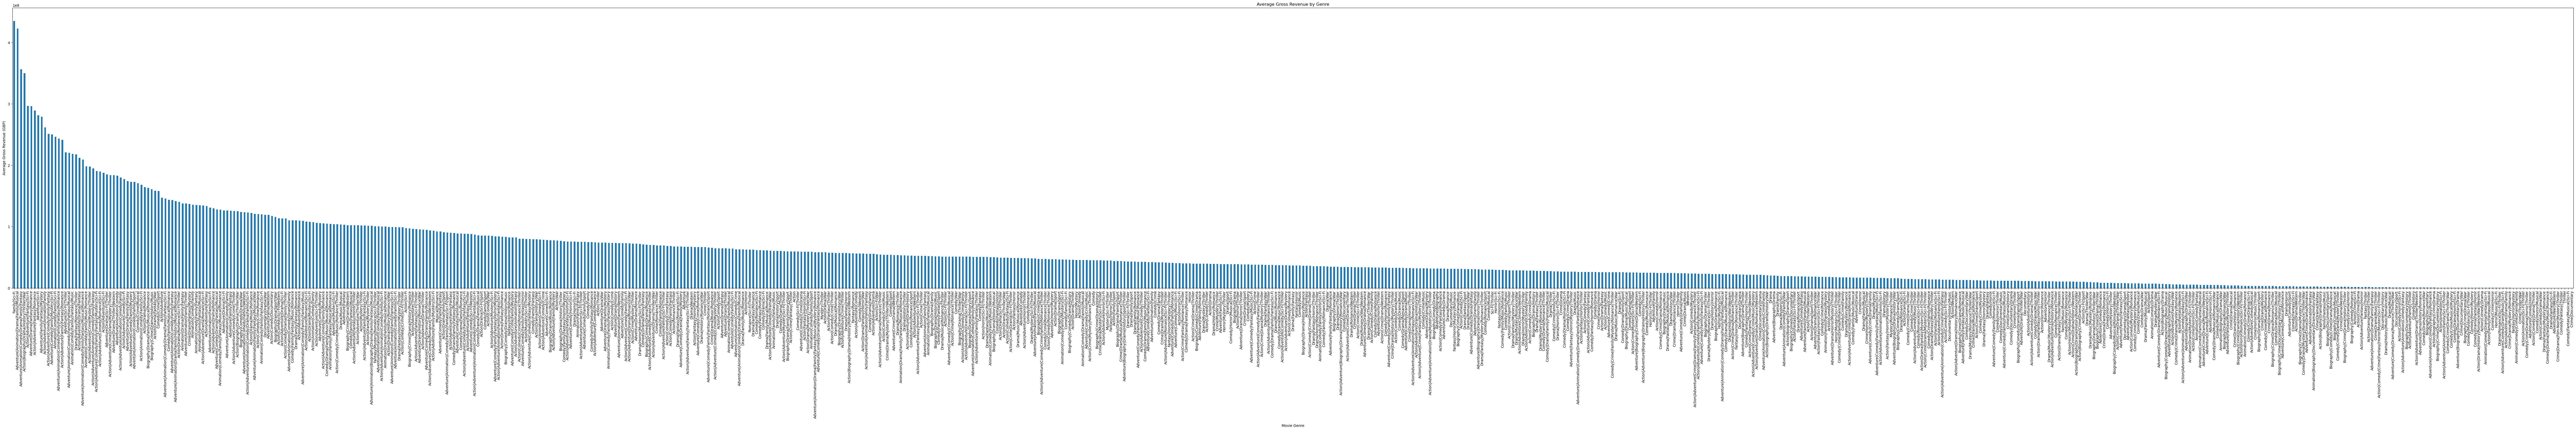

In [46]:
# Sample code for genre vs. box office returns
avg_revenue_by_genre = df.groupby('genres')['gross'].mean().sort_values(ascending=False)
avg_revenue_by_genre.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Movie Genre', labelpad=15)
plt.ylabel('Average Gross Revenue (GBP)')
plt.title('Average Gross Revenue by Genre')
#plt.xticks(x, Genres, rotation ='vertical')
plt.subplots_adjust(bottom=0.2, top=2.0, right=10.0)
plt.show()

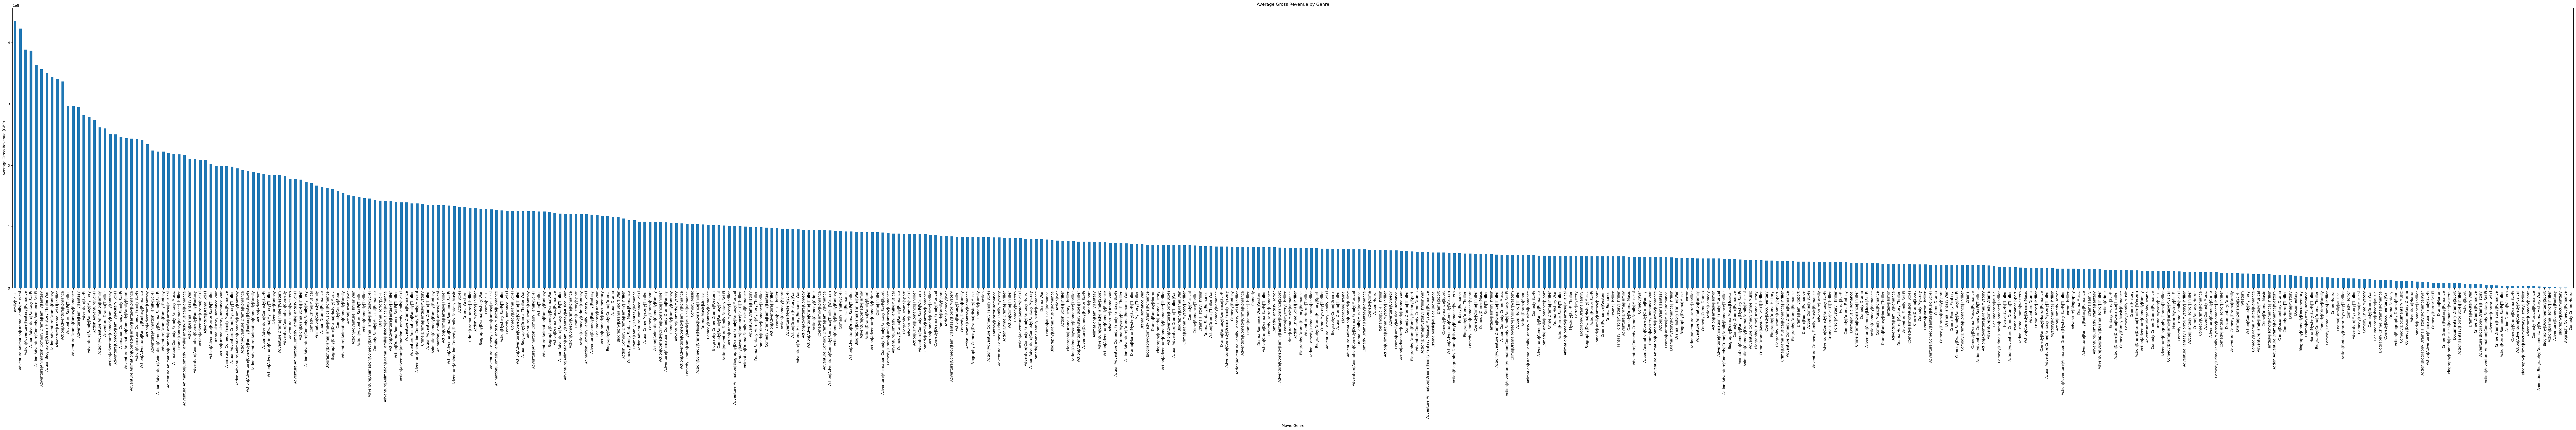

In [47]:
# Sample code for genre vs. box office returns
avg_revenue_by_genre = profit_movies_df.groupby('genres')['gross'].mean().sort_values(ascending=False)
avg_revenue_by_genre.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Movie Genre', labelpad=15)
plt.ylabel('Average Gross Revenue (GBP)')
plt.title('Average Gross Revenue by Genre')
#plt.xticks(x, Genres, rotation ='vertical')
plt.subplots_adjust(bottom=0.2, top=2.0, right=10.0)
plt.show()

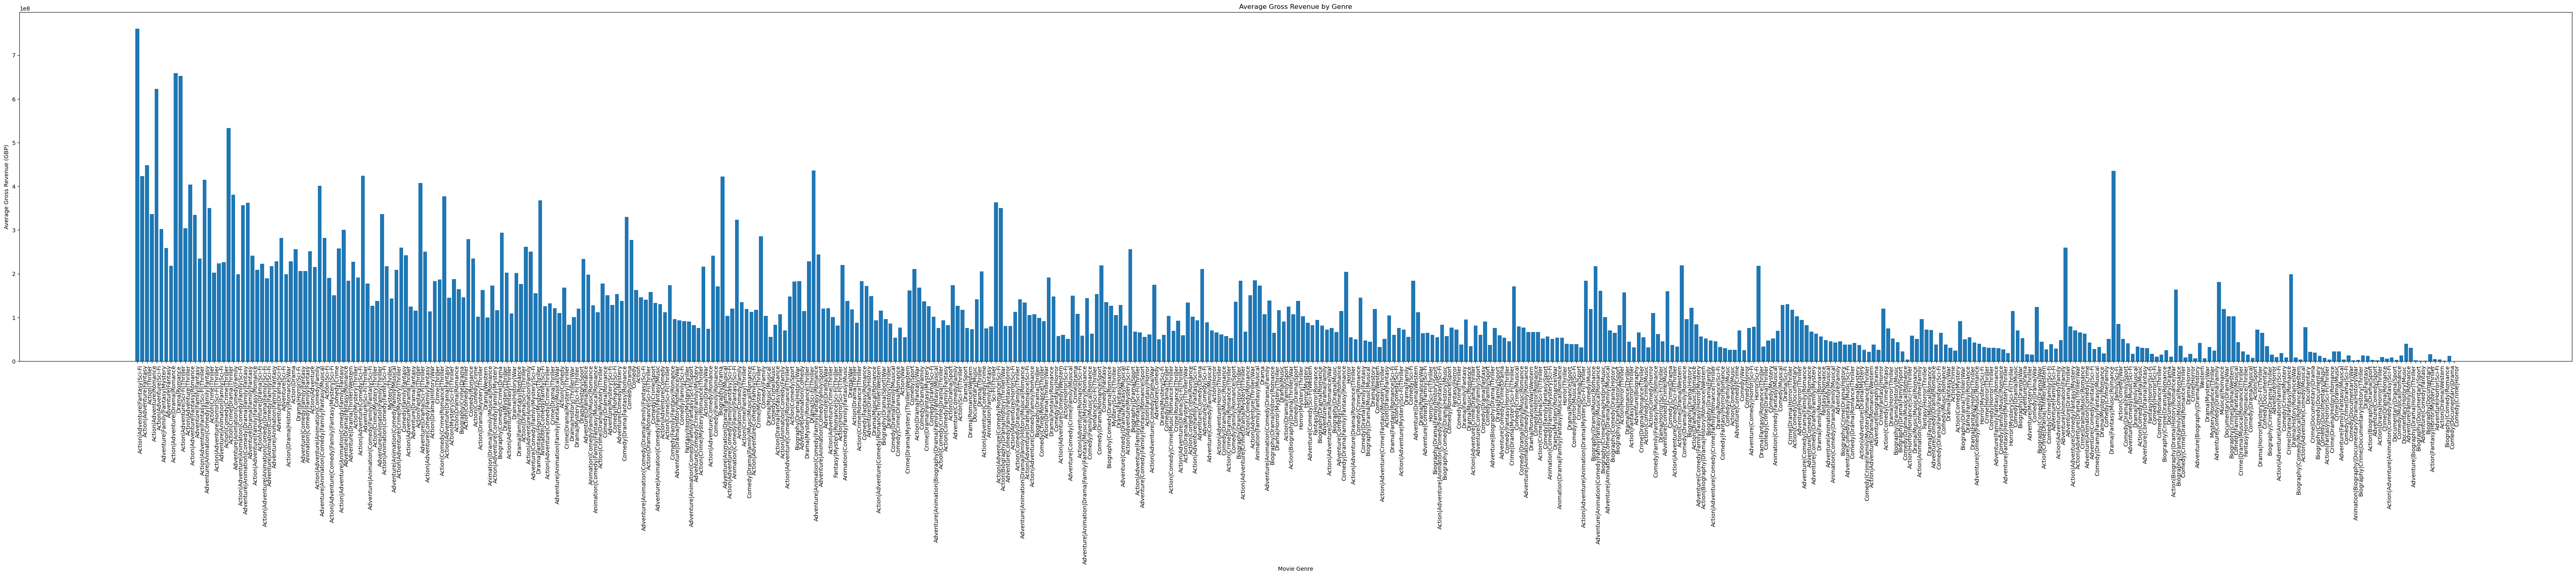

In [45]:
import matplotlib.pyplot as plt

# Sample data
genres = profit_movies_df.genres
avg_revenue = profit_movies_df.gross

# Create a bar chart
plt.bar(genres, avg_revenue)

# Customize x-axis labels
plt.xticks(rotation=90, ha='right', rotation_mode='anchor')
plt.subplots_adjust(bottom=0.2, top=2.0, right=10.0)  # Adjust the bottom margin to make room for rotated labels

# Labeling and title
plt.xlabel('Movie Genre')
plt.ylabel('Average Gross Revenue (GBP)')
plt.title('Average Gross Revenue by Genre')

# Show the plot
plt.show()
